In this notebook we will show how to apply albumentations to the keypoint problem.


Keypoints augmentations are implemented for spatial transformations of:
 * VerticalFlip
 * HorizontalFlip
 * Flip
 * RandomCrop
 * RandomRotate90
 * Rotate
 * CenterCrop
 * RandomSizedCrop
 
Any combination of the above transformations and non spatial transformations can be used.


Spatial transformations that do **NOT** support keypoint transformations at the moment are:
* Crop
* LongestMaxSize
* SmallestMaxSize
* Resize

We are planning to implement them, but if someone is willing to implement them and create a Pull Request, it would make use happy :)

In [1]:
%matplotlib inline
from urllib.request import urlopen
from matplotlib import pyplot as plt

import albumentations as albu
import numpy as np
import cv2
import os

In [2]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
def vis_points(image, points, diameter=15):
    im = image.copy()

    for (x, y) in points:
        cv2.circle(im, (int(x), int(y)), diameter, (0, 255, 0), -1)

    plt.imshow(im)

In [4]:
image = download_image('https://habrastorage.org/webt/_m/8j/vb/_m8jvb11szwten8kxx5a5rgkhcw.jpeg')

In [5]:
points = [(100, 100), (720, 410), (1100, 400), (1700, 30), 
          (300, 650), (1570, 590), (560, 800), (1300, 750), 
          (900, 1000), (910, 780), (670, 670), (830, 670), 
          (1000, 670), (1150, 670), (820, 900), (1000, 900)]

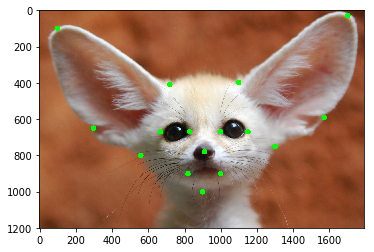

In [6]:
vis_points(image, points)

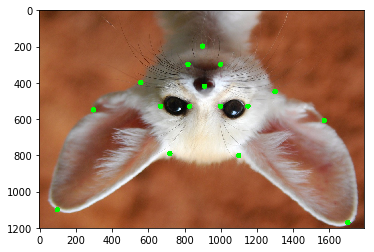

In [7]:
transformed = albu.Compose([albu.VerticalFlip(p=1)], 
                           p=1, 
                           keypoint_params={'format': 'xy'})(image=image, keypoints=points)

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

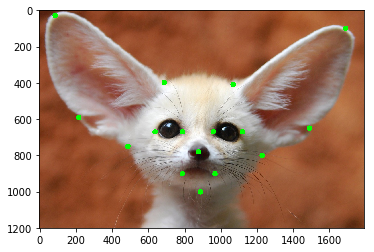

In [8]:
transformed = albu.Compose([albu.HorizontalFlip(p=1)], 
                           p=1, 
                           keypoint_params={'format': 'xy'})(image=image, keypoints=points)

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

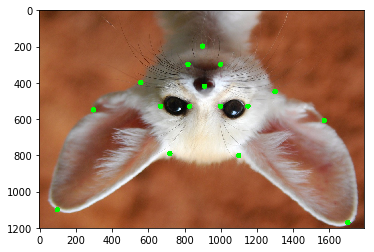

In [9]:
transformed = albu.Compose([albu.Flip(p=1)], 
                           p=1, 
                           keypoint_params={'format': 'xy'})(image=image, keypoints=points)

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

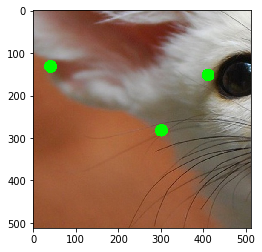

In [10]:
transformed = albu.Compose([albu.RandomCrop(width=512, height=512, p=1)], 
                           p=1, 
                           keypoint_params={'format': 'xy'})(image=image, keypoints=points)

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

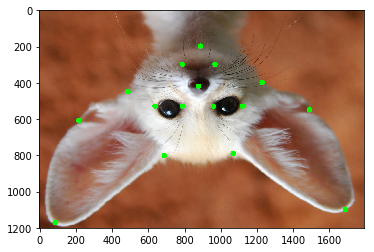

In [11]:
transformed = albu.Compose([albu.RandomRotate90(p=1)], 
                           p=1, 
                           keypoint_params={'format': 'xy'})(image=image, keypoints=points)

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

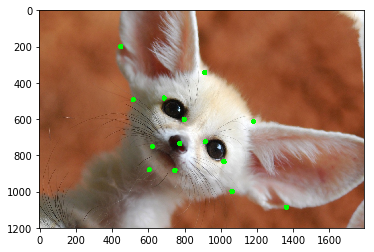

In [12]:
transformed = albu.Compose([albu.Rotate(p=1)],
                           p=1, 
                           keypoint_params={'format': 'xy'})(image=image, keypoints=points)

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

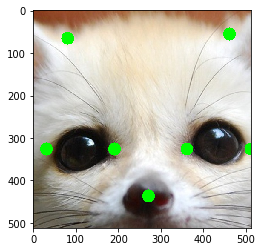

In [13]:
transformed = albu.Compose([albu.CenterCrop(height=512, width=512, p=1)],
                           p=1, 
                           keypoint_params={'format': 'xy'})(image=image, keypoints=points)

keypoints = transformed['keypoints']
im = transformed['image']
vis_points(im, keypoints)

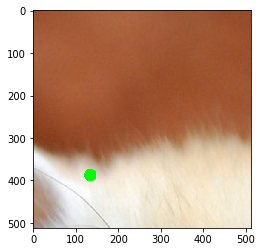

In [14]:
transformed = albu.Compose([albu.RandomSizedCrop(min_max_height=(256, 1025), height=512, width=512, p=1)],
                           p=1, 
                           keypoint_params={'format': 'xy'})(image=image, keypoints=points)

keypoints = transformed['keypoints']
im = transformed['image']


vis_points(im, keypoints)

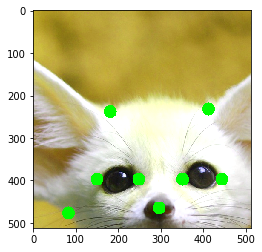

In [15]:
transformed = albu.Compose([albu.RandomSizedCrop(min_max_height=(256, 1025), height=512, width=512, p=0.5),
                            albu.HorizontalFlip(p=0.5),
                            albu.HueSaturationValue(p=0.5),
                            albu.RandomBrightnessContrast(p=0.5)
                           ],
                           p=1, 
                           keypoint_params={'format': 'xy'})(image=image, keypoints=points)

keypoints = transformed['keypoints']
im = transformed['image']


vis_points(im, keypoints)